In [399]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from matplotlib.ticker import FuncFormatter

In [401]:
df=pd.read_csv("marketing_data.csv")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,...,5,2,0,0,0,0,0,1,0,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,...,7,6,1,0,0,0,0,1,0,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,...,3,5,0,0,0,0,0,0,0,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,...,9,4,0,0,0,0,0,0,0,IND


In [403]:
df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

##### As Dt_Customer contains Dates, we will convert it to Datetime

In [409]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],format=('%d-%m-%y'))

##### Removing Spaces from column names (we can see there are some empty spaces in "Income" column name)


In [411]:
df.rename(columns=lambda x: x.strip(), inplace=True)

##### Converting "Income" column to numeric type

In [413]:
df["Income"]=df["Income"].str.replace('$','')
df['Income'] = df['Income'].str.replace(',', '').str.strip()

In [415]:
df["Income"]=pd.to_numeric(df["Income"])

In [417]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

##### Checking for null values

In [419]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

##### Imputing null values in "Income" Column

In [421]:
mean_values=df.groupby(["Education","Marital_Status"])["Income"].transform('mean')
df['Income']=df['Income'].fillna(mean_values)
df.isnull().sum().sum()

0

#### Create variables to represent the total number of children, age, and total spending..

In [423]:
df["No. of Children"]=df["Kidhome"]+df["Teenhome"]
df["Age"]=2024 - df['Year_Birth']
df["Total Spending"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,No. of Children,Age,Total Spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,0,54,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,0,63,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,1,66,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,AUS,2,57,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,SP,1,35,91


#### Derive the total purchases from the number of transactions across the three channels.

In [425]:
df["Total Purchases"]=df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,No. of Children,Age,Total Spending,Total Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,54,1190,14
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,63,577,17
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,1,66,251,10
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,2,57,11,3
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,1,35,91,6


#### Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.


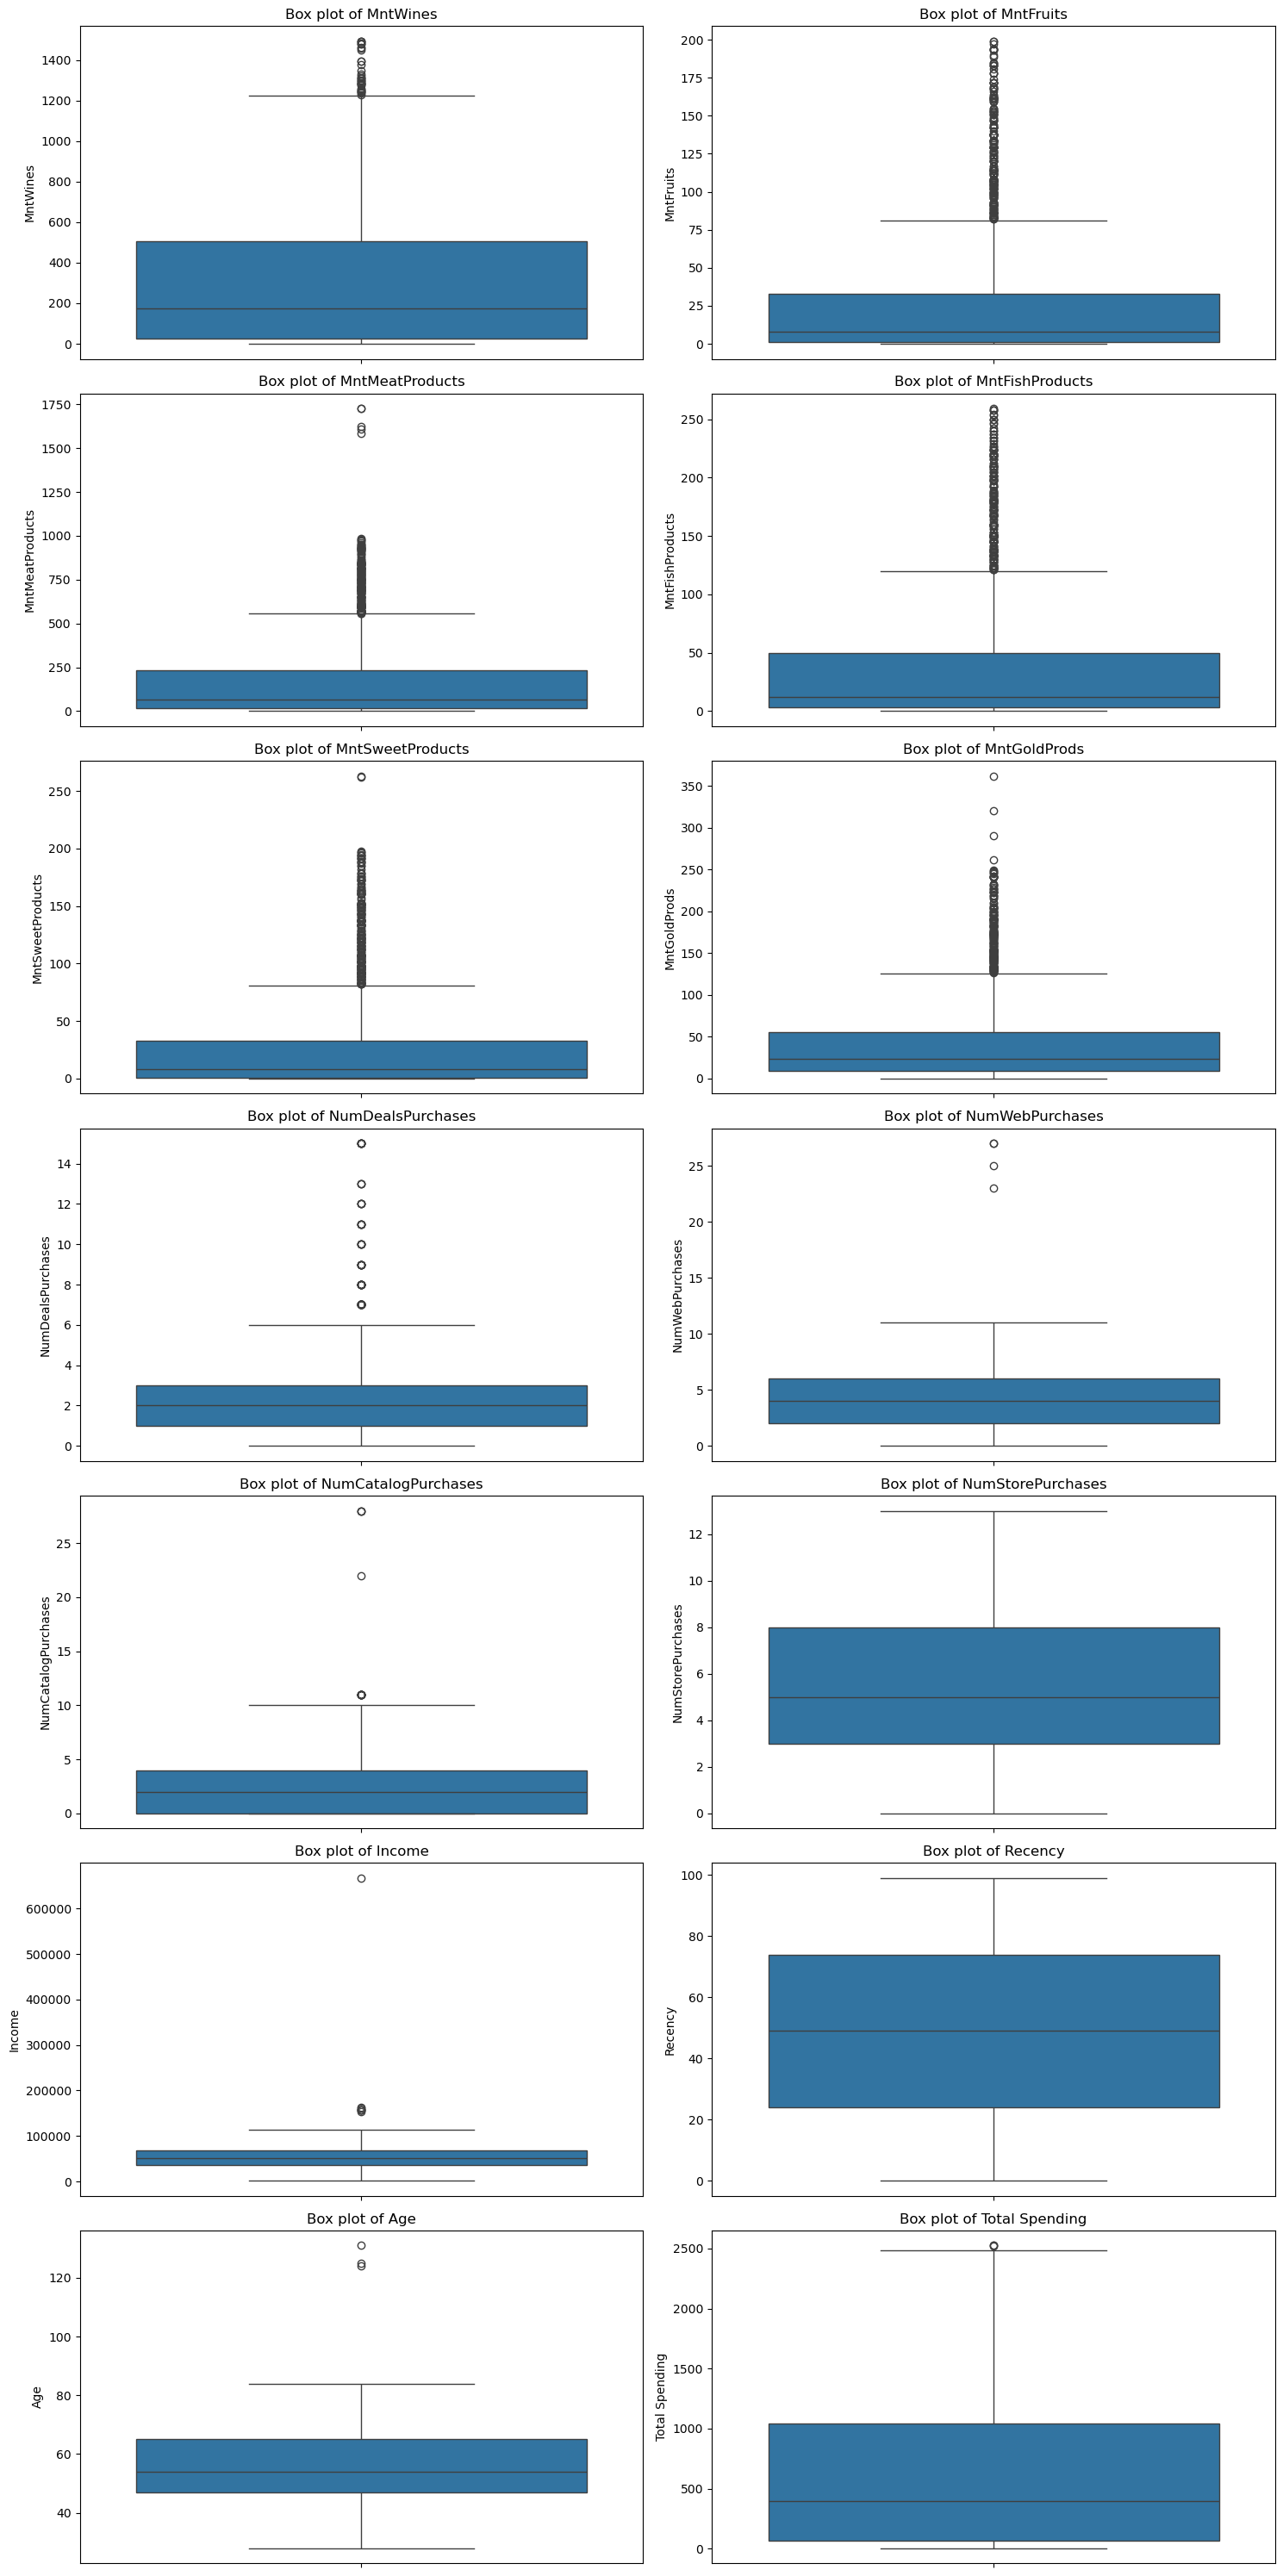

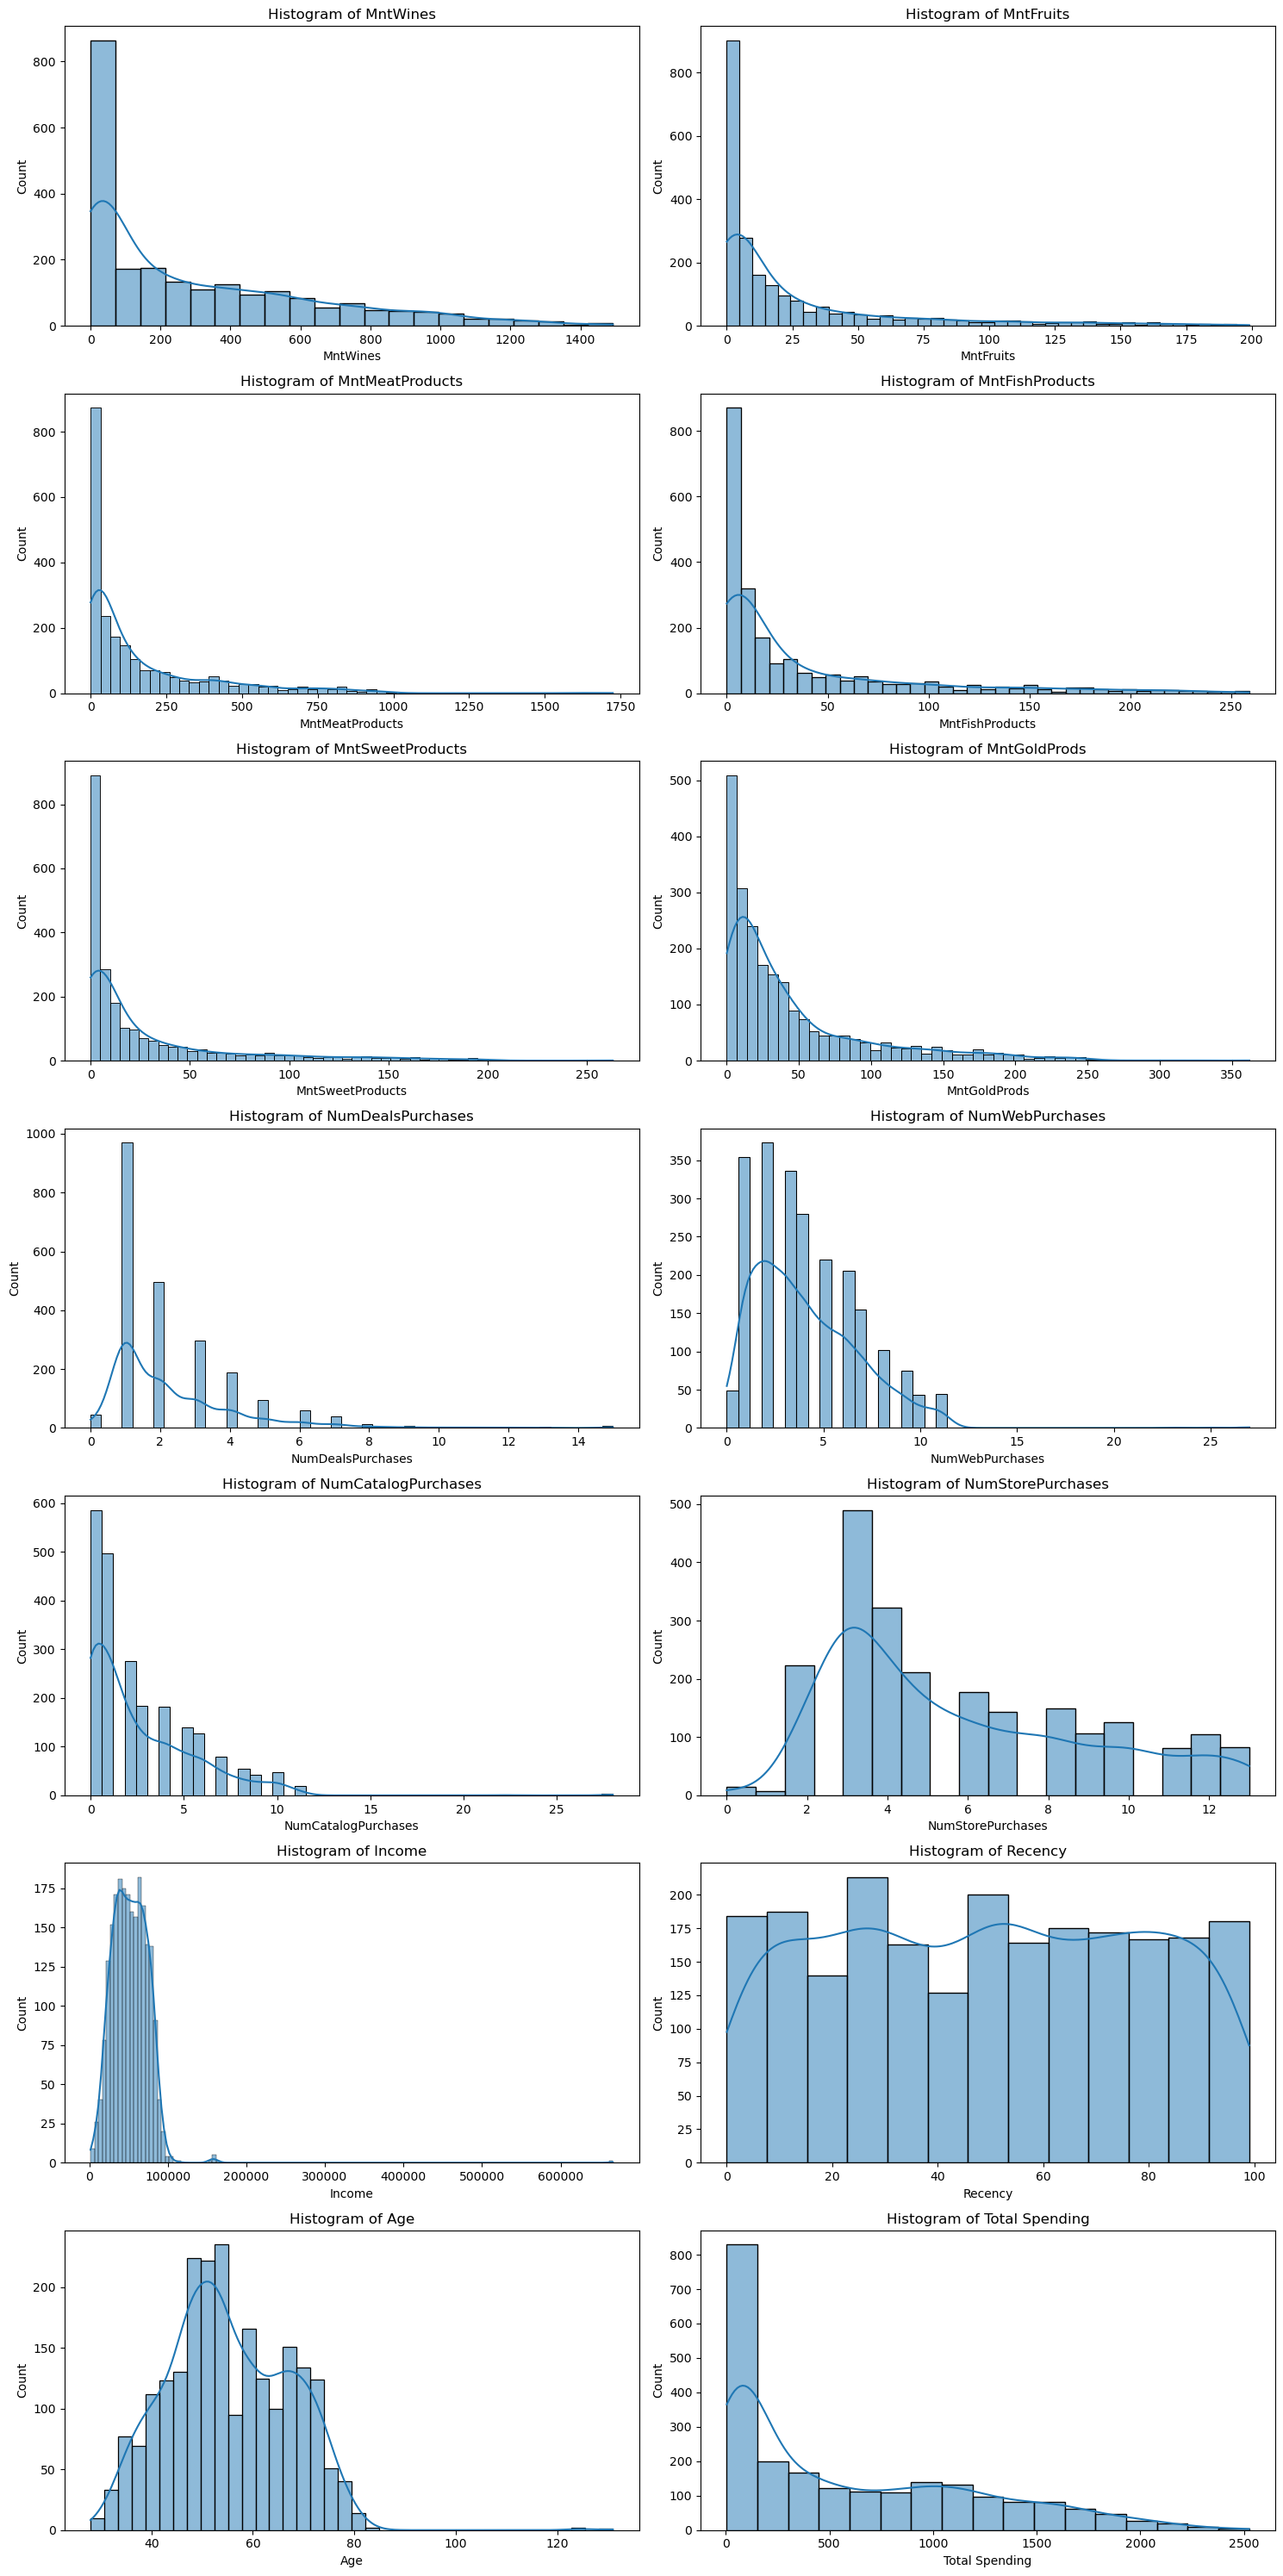

In [427]:
columns_to_plot = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                   'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'Income', 'Recency', 'Age', 'Total Spending']
# Generate Box Plots
plt.figure(figsize=(15, 30))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(7, 2, i)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Generate Histograms
plt.figure(figsize=(15, 30))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(7, 2, i)# 3 rows and 5 columns
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

##### Treating Outliers

In [429]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return lower_bound, upper_bound
# Treat outliers for each column in the list
outlier_bounds = {}
for col in columns_to_plot:
    bounds = treat_outliers_iqr(df, col)
    outlier_bounds[col] = bounds

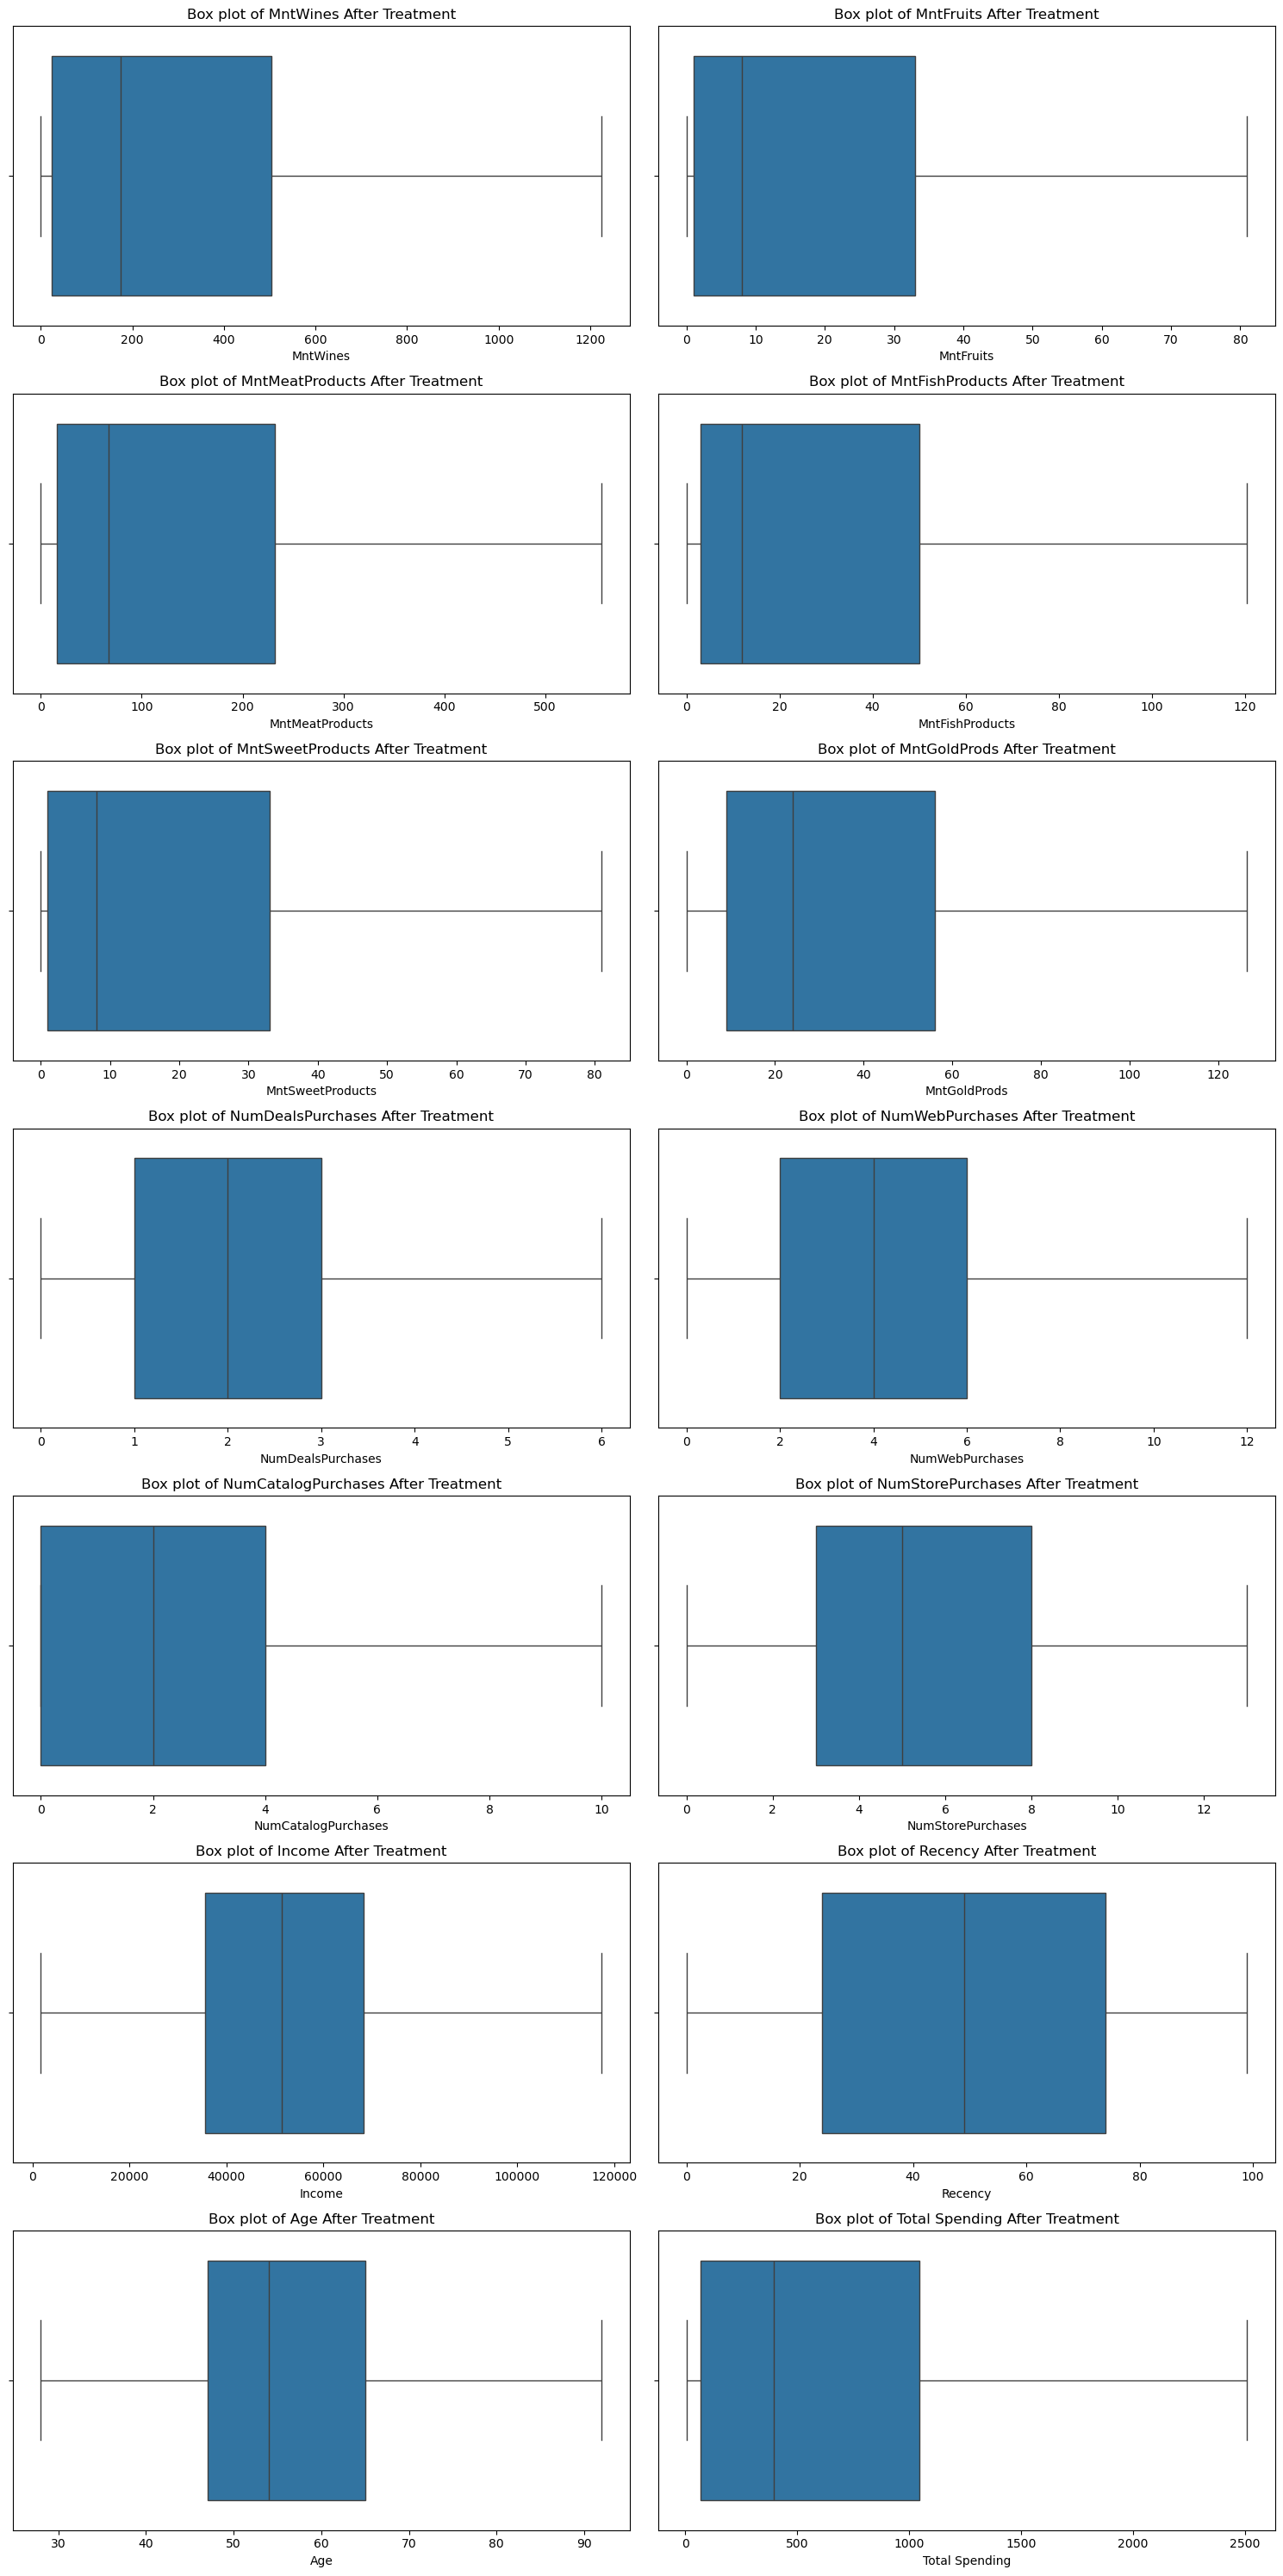

In [431]:
# Generate Box Plots after outlier treatment
plt.figure(figsize=(15, 30))  # Adjust figure size as needed
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(7, 2, i)  # 7 rows and 2 columns
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col} After Treatment')
plt.tight_layout()
plt.show()


#### Apply ordinal and one-hot encoding based on the various types of categorical variables.


In [433]:
df["Education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [435]:
encoder = OrdinalEncoder(categories=[['Basic', '2n Cycle', 'Graduation','Master','PhD']])
df['Education_encoded'] = encoder.fit_transform(df[['Education']])
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,No. of Children,Age,Total Spending,Total Purchases,Education_encoded
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0.0,189.0,...,0,0,1,0,SP,0,54.0,1190.0,14,2.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0.0,464.0,...,0,1,1,0,CA,0,63.0,577.0,17,2.0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0.0,134.0,...,0,0,0,0,US,1,66.0,251.0,10,2.0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0.0,10.0,...,0,0,0,0,AUS,2,57.0,11.0,3,2.0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0.0,6.0,...,0,0,1,0,SP,1,35.0,91.0,6,2.0
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0.0,336.0,...,0,0,1,0,SP,0,66.0,1192.0,16,4.0
6,4073,1954,2n Cycle,Married,63564.0,0,0,2014-01-29,0.0,769.0,...,0,0,1,0,GER,0,70.0,1215.0,27,1.0
7,1991,1967,Graduation,Together,44931.0,0,1,2014-01-18,0.0,78.0,...,0,0,0,0,SP,1,57.0,96.0,6,2.0
8,4047,1954,PhD,Married,65324.0,0,1,2014-01-11,0.0,384.0,...,0,0,0,0,US,1,70.0,544.0,17,4.0
9,9477,1954,PhD,Married,65324.0,0,1,2014-01-11,0.0,384.0,...,0,0,0,0,IND,1,70.0,544.0,17,4.0


In [437]:
oheencode = OneHotEncoder(sparse_output=False)
ohe_data = oheencode.fit_transform(df[['Marital_Status','Country']])
pd.DataFrame(ohe_data, columns=oheencode.get_feature_names_out(['Marital_Status','Country']))

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Generate a heatmap to illustrate the correlation between different pairs of variables.

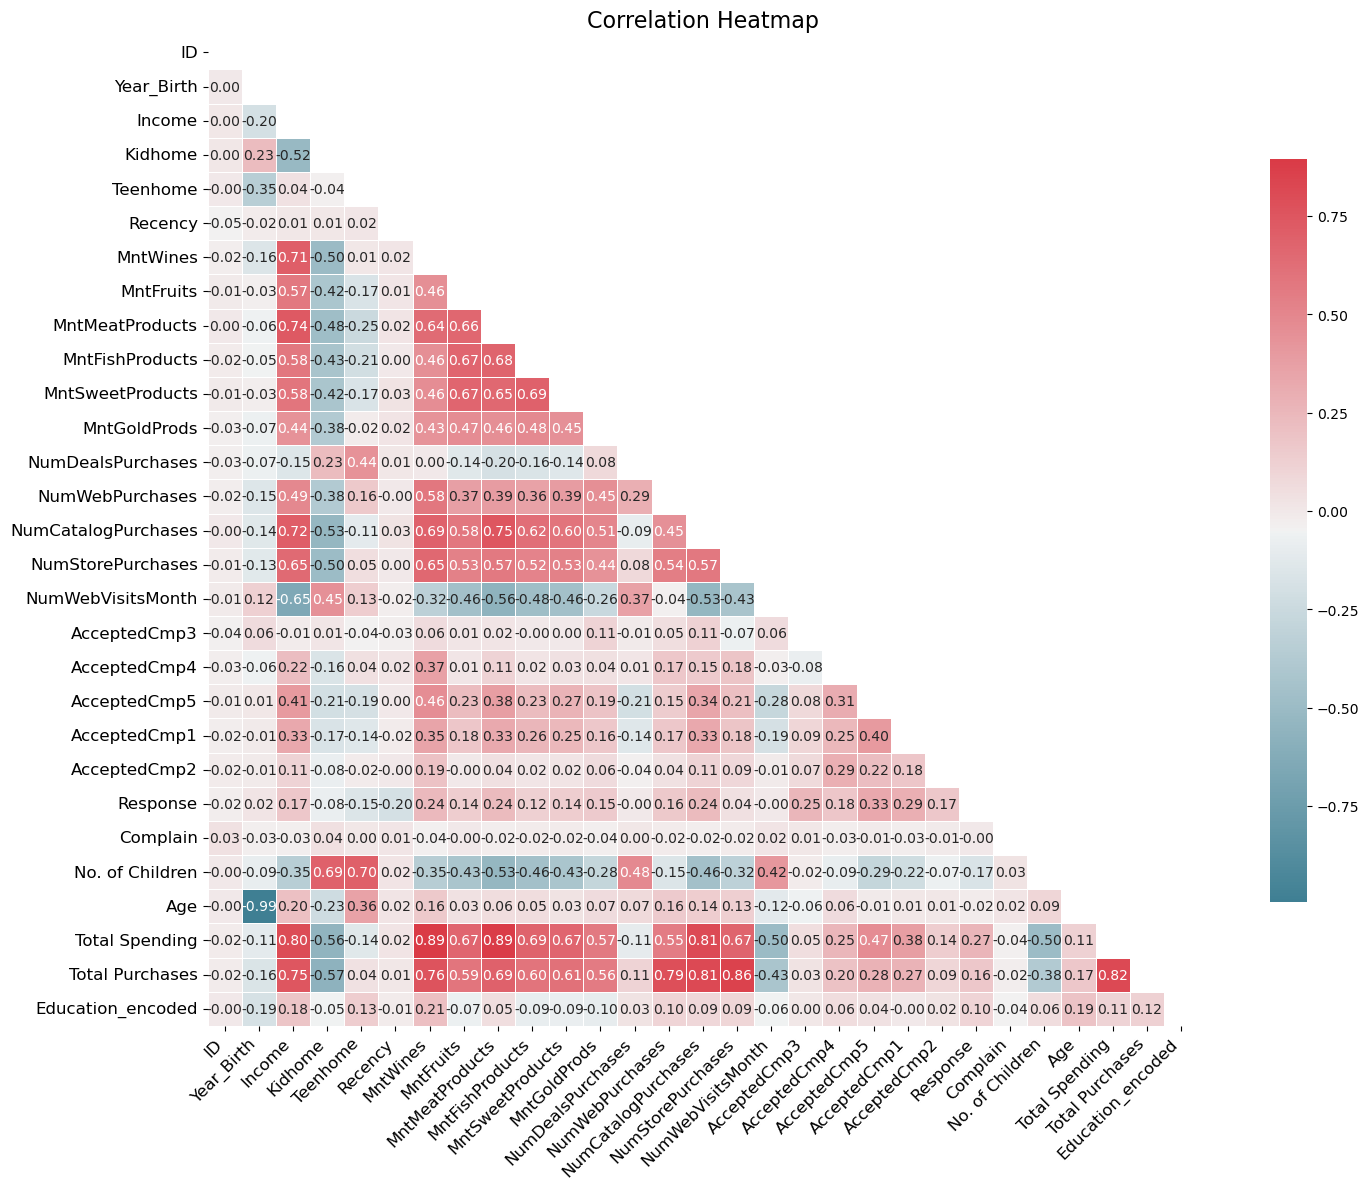

In [439]:
numerical_columns = df.select_dtypes(include=['number']).columns

corr_matrix = df[numerical_columns].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12)) 

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", 
            linewidths=0.5, square=True, cbar_kws={"shrink": 0.75}, 
            annot_kws={"size": 10})  

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout() 
plt.show()

In [441]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,No. of Children,Age,Total Spending,Total Purchases,Education_encoded
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0.0,189.0,...,0,0,1,0,SP,0,54.0,1190.0,14,2.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0.0,464.0,...,0,1,1,0,CA,0,63.0,577.0,17,2.0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0.0,134.0,...,0,0,0,0,US,1,66.0,251.0,10,2.0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0.0,10.0,...,0,0,0,0,AUS,2,57.0,11.0,3,2.0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0.0,6.0,...,0,0,1,0,SP,1,35.0,91.0,6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99.0,372.0,...,0,0,0,0,US,1,48.0,689.0,18,4.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99.0,5.0,...,0,0,0,0,SP,1,47.0,55.0,4,1.0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99.0,185.0,...,0,0,0,0,SP,1,48.0,309.0,12,2.0
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99.0,267.0,...,0,0,0,0,IND,0,46.0,1383.0,19,2.0


# Hypothesis Testing

#### a. Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.


H0: There is no association between age groups and shopping preference


H1: There is association between age groups and shopping preference

In [443]:
def pvalue_check(pval,alpha=0.05):
    if pval < alpha:
        print("Reject Null hypo")
    else:
        print("Fail to reject null hypo")    


In [445]:
conditions = [
    (df['NumStorePurchases'] > df['NumWebVisitsMonth']),  # Prefers in-store shopping
    (df['NumWebVisitsMonth'] > df['NumStorePurchases']),  # Prefers online shopping
]

# Define corresponding shopping preferences
choices = ['In-store', 'Online']

# Create the shopping_preference column
df['shopping_preference'] = np.select(conditions, choices, default='Mixed')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Response,Complain,Country,No. of Children,Age,Total Spending,Total Purchases,Education_encoded,shopping_preference
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0.0,189.0,...,0,1,0,SP,0,54.0,1190.0,14,2.0,In-store
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0.0,464.0,...,1,1,0,CA,0,63.0,577.0,17,2.0,In-store
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0.0,134.0,...,0,0,0,US,1,66.0,251.0,10,2.0,In-store
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0.0,10.0,...,0,0,0,AUS,2,57.0,11.0,3,2.0,Online
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0.0,6.0,...,0,1,0,SP,1,35.0,91.0,6,2.0,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99.0,372.0,...,0,0,0,US,1,48.0,689.0,18,4.0,In-store
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99.0,5.0,...,0,0,0,SP,1,47.0,55.0,4,1.0,Online
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99.0,185.0,...,0,0,0,SP,1,48.0,309.0,12,2.0,Online
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99.0,267.0,...,0,0,0,IND,0,46.0,1383.0,19,2.0,In-store


In [447]:
bins = [0, 30, 50, 70, 100]
labels = ['Young', 'Middle-aged', 'Old', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
contingency_table = pd.crosstab(df['Age_Group'], df['shopping_preference'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")
pvalue_check(p)

Chi-Square Statistic: 46.744268841445425, p-value: 2.104256339244751e-08
Reject Null hypo


#### b. Customers with children likely experience time constraints, making online shopping a more convenient option.



H0: There is no association between having children and shopping preference


H1: There is association between having children and shopping preference.

In [449]:
df["Has_Children"]= df['No. of Children'].apply(lambda x: 'Yes' if x > 0 else 'No')
contingency_table = pd.crosstab(df['Has_Children'], df['shopping_preference'])

# Perform Chi-Square Test
chi2_child, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_child}, p-value: {p}")
pvalue_check(p)

Chi-Square Statistic: 369.7391189518832, p-value: 5.154308962419055e-81
Reject Null hypo


#### c. Sales at physical stores may face the risk of cannibalization by alternative distribution channels.

In [451]:
import statsmodels.api as sm

X = df['NumWebPurchases']  # Online purchases (Independent Variable)
y = df['NumStorePurchases']  # Physical store purchases (Dependent Variable)

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)
# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the summary of the regression model
print(model.summary())
f_pvalue = model.f_pvalue
r_squared = model.rsquared
pvalue_check(f_pvalue)

                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     937.3
Date:                Sun, 13 Oct 2024   Prob (F-statistic):          3.03e-172
Time:                        10:53:53   Log-Likelihood:                -5427.0
No. Observations:                2240   AIC:                         1.086e+04
Df Residuals:                    2238   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0809      0.106     

#### d. Does the United States significantly outperform the rest of the world in total purchase volumes?



H0: There is no significant difference in total purchase volumes between the US and other countries.


H1: There is significant difference in total purchase volumes between the US and other countries.?

In [454]:
us_data = df[df['Country'] == 'US']['Total Purchases']
non_us_data = df[df['Country'] != 'US']['Total Purchases']

# Perform t-test
t_stat, p_value = stats.ttest_ind(us_data, non_us_data)
print(f"T-statistic: {t_stat}, p-value: {p_value}")
pvalue_check(p_value)

T-statistic: 1.4512386847675383, p-value: 0.14685355981832418
Fail to reject null hypo


## Data Visualization

#### a. Identify the top-performing products and those with the lowest revenue.


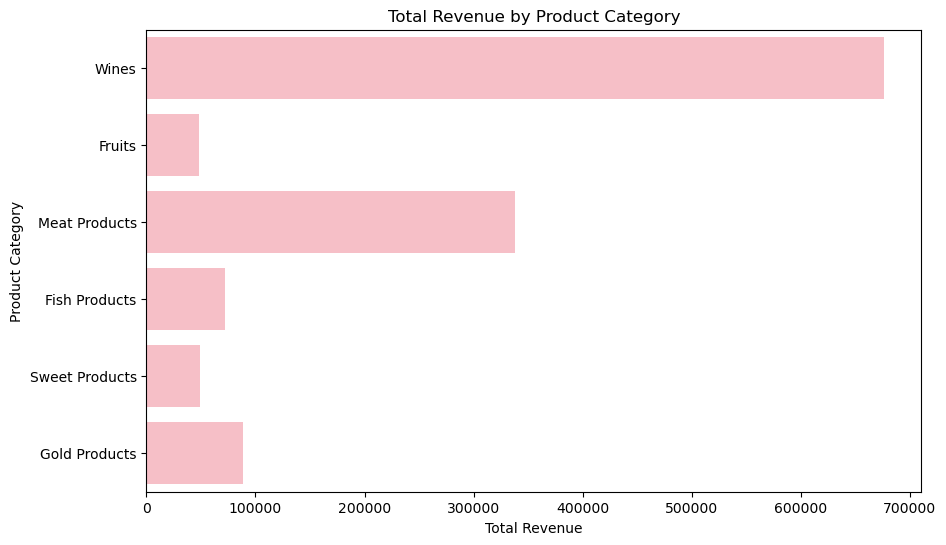

In [456]:
product_revenue = {
    'Wines': df['MntWines'].sum(),
    'Fruits': df['MntFruits'].sum(),
    'Meat Products': df['MntMeatProducts'].sum(),
    'Fish Products': df['MntFishProducts'].sum(),
    'Sweet Products': df['MntSweetProducts'].sum(),
    'Gold Products': df['MntGoldProds'].sum()
}

product_revenue_df = pd.DataFrame(list(product_revenue.items()), columns=['Product', 'Total_Revenue'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Revenue', y='Product', data=product_revenue_df, color='Lightpink')
plt.title('Total Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()

#### Top selling product- Wine

#### Lowest revenue products- Fruit and sweet products

#### b. Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.

<Axes: >

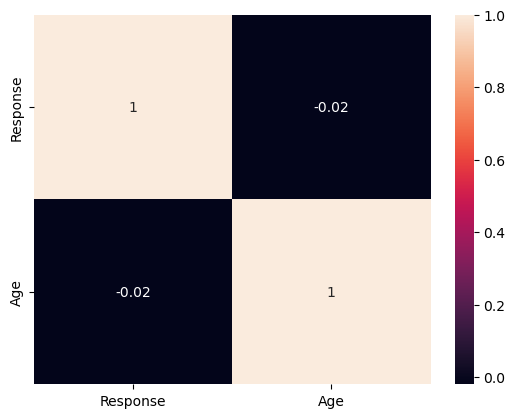

In [458]:
corr_matrix_age_acceptance = (df[['Response','Age']]).corr()
sns.heatmap(corr_matrix_age_acceptance,annot=True)

##### No correlation between customers age and acceptance of last campaign.

#### c. Determine the country with the highest number of customers who accepted the last campaign.


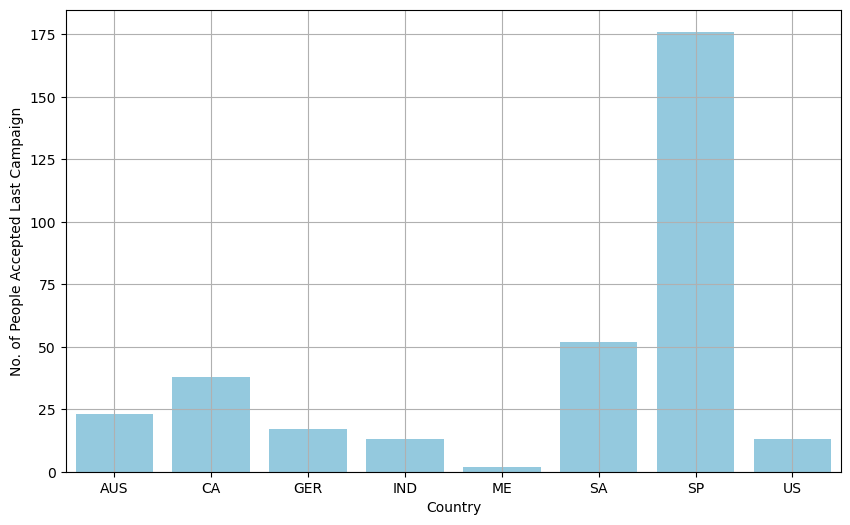

In [460]:
country_accepted_last_campaign=df.groupby("Country")["Response"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(country_accepted_last_campaign, x='Country', y='Response', color='Skyblue')
plt.xlabel("Country")
plt.ylabel("No. of People Accepted Last Campaign")
plt.grid()
plt.show()

#### country with the highest number of customers who accepted the last campaig is 'SP'.

#### d. Investigate if there is a discernible pattern in the number of children at home and the total expenditure.

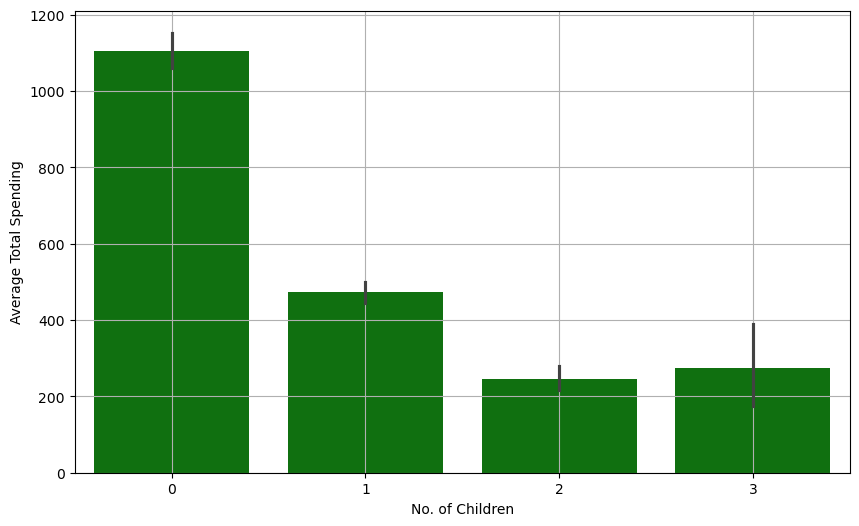

In [462]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="No. of Children", y="Total Spending",color="green")
plt.xlabel("No. of Children")
plt.ylabel("Average Total Spending")
plt.grid()
plt.show()

##### People with less number of childern are spending more.

#### e. Analyze the educational background of customers who lodged complaints in the last two years.

([<matplotlib.patches.Wedge at 0x2338dc649b0>,
 [Text(-0.5500000594609755, 0.9526279098330699, 'Graduation'),
  Text(0.0822032521067005, -1.096924165721169, '2n Cycle'),
  Text(0.9088627463689384, -0.6196519250859395, 'Master'),
  Text(1.0877139352529008, -0.1639463176062465, 'PhD')],
 [Text(-0.30000003243325934, 0.5196152235453108, '67%'),
  Text(0.04483813751274573, -0.5983222722115467, '19%'),
  Text(0.49574331620123907, -0.3379919591377851, '10%'),
  Text(0.5932985101379459, -0.08942526414886172, '5%')])

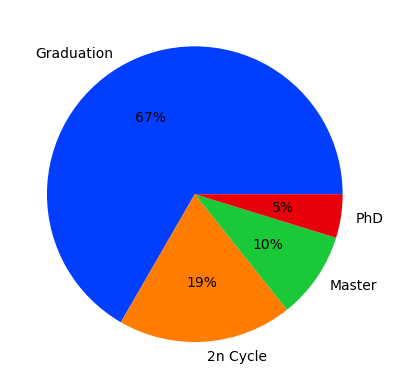

In [464]:
complaint_data = df[df['Complain'] == 1]
education_counts = complaint_data['Education'].value_counts()
palette_color = sns.color_palette('bright') 
plt.pie(education_counts, labels=education_counts.index, colors=palette_color, autopct='%.0f%%') 

#### e. Customers who lodged complaint in the last two years are mostly Graduate.